In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import forestplot as fp

In [3]:
# Calculate the 95% confidence interval of the OR
def confidence_intervals(df):
    N1 = df['Case in cluster']    
    N0 = df['Case out of cluster'] 
    total_population = 45174
    total_cases = N1 + N0
    N1_total = df['Number of people']    
    N0_total = total_population - N1_total  
    OR = df['OR']
    z_value = 1.96

    # The logarithmic standard error of OR
    SE_logOR = np.sqrt(1/N1 + 1/N0 + 1/(N1_total - N1) + 1/(N0_total - N0))
    
    # The confidence interval of log(OR)
    log_OR = np.log(OR)
    log_OR_lower = log_OR - z_value * SE_logOR
    log_OR_upper = log_OR + z_value * SE_logOR
    
    # Lower CI and Upper CI
    Lower_CI = np.round(np.exp(log_OR_lower), 1)
    Upper_CI = np.round(np.exp(log_OR_upper), 1)
    or_ci = f"{OR}[{Lower_CI}-{Upper_CI}]"
    
    return Lower_CI, Upper_CI, or_ci
    
# Create forest plot
def forest(data, figsize, labelcoo, title, y):
    fig = fp.forestplot(data,  
                  estimate='OR',
                  ll="Lower_CI", hl="Upper_CI",
                  varlabel="Cluster", 
                  pval="p_value",
                  sort=True,
                  color_alt_rows=True,
                  ci_report=False, 
                  flush=False,
                  rightannote=['OR(95% CI)','p_value'],
                  right_annoteheaders=['OR(95% CI)','P_val'],
                  figsize=figsize, 
                  xlabel="Odds Ratio",
                  **{"marker": "D", 
                     "markersize": 20})
    ax = plt.gca()
    ax.xaxis.set_label_coords(*labelcoo) 
    plt.axvline(x=1, linestyle='--', color='#808080')
    plt.title(title, fontweight='bold', y=y) 
    
    return plt.gcf()

In [5]:
data = pd.read_excel('/Your_path/forestplot.xlsx')
results = data.apply(confidence_intervals, axis=1, result_type='expand')
data ['Lower_CI'] = results[0]
data ['Upper_CI'] = results[1]
data ['OR(95% CI)'] = results[2]

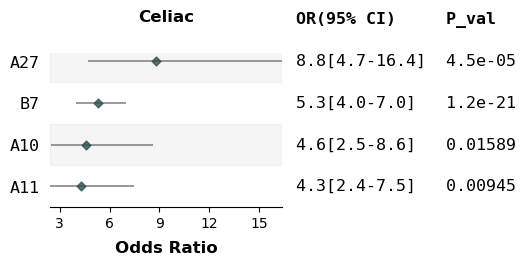

In [7]:
df1 = data[data['Disease']=='celiac']
fig = forest(df1, (3,2), (0.5,-0.22), 'Celiac', 1.15)
fig.savefig(f'Fig2_A.png', dpi=1000, bbox_inches='tight')

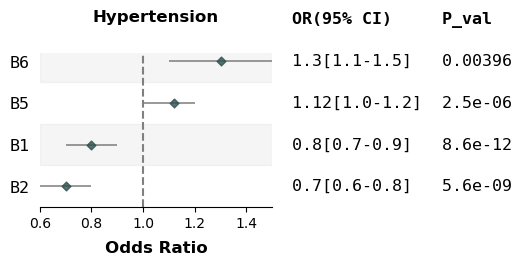

In [9]:
df2 = data[data['Disease']=='hypertension']
fig = forest(df2, (3,2), (0.5,-0.22), 'Hypertension', 1.15)
fig.savefig(f'Fig2_B.png', dpi=1000, bbox_inches='tight')

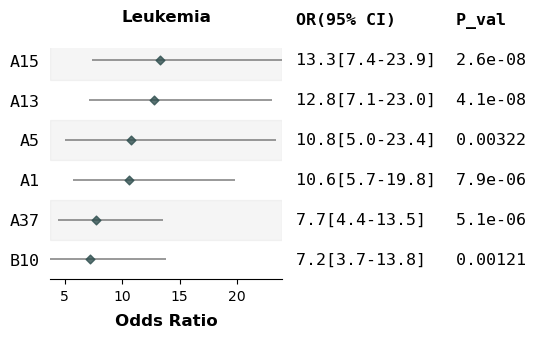

In [11]:
df3 = data[data['Disease']=='leukemia']
fig = forest(df3, (3,3), (0.5,-0.15), 'Leukemia', 1.08)
fig.savefig(f'Fig2_C.png', dpi=1000, bbox_inches='tight')